In [63]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.impute import SimpleImputer
from sklearn.manifold import TSNE
%matplotlib inline

In [64]:
stroke_data = pd.read_csv("../data/healthcare-dataset-stroke-data.csv")

In [65]:
stroke_data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


## Gender Exploration

In [66]:
#get amount
genders = stroke_data.groupby(by = ["gender"]).count()
genders

,id,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
gender,,,,,,,,,,,
Female,2994,2994,2994,2994,2994,2994,2994,2994,2897,2994,2994
Male,2115,2115,2115,2115,2115,2115,2115,2115,2011,2115,2115
Other,1,1,1,1,1,1,1,1,1,1,1


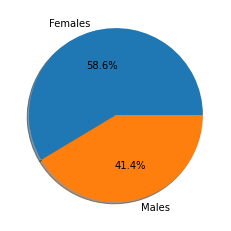

In [67]:
explode = [0,0]
pie_chart = plt.pie([genders.loc["Female"].max(),genders.loc["Male"].max()], explode = explode,labels = ["Females","Males"],shadow = True,autopct='%1.1f%%')

Seems like there is a slight inbalance in the data with genders, hopefully this will not add unwanted bias

## Age exploration

Text(0, 0.5, 'Frequency')

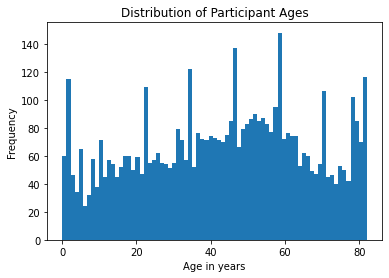

In [68]:
dist = plt.hist(stroke_data['age'],bins = 75)
plt.title("Distribution of Participant Ages")
plt.xlabel("Age in years")
plt.ylabel("Frequency")

In [69]:
stroke_data['age'].describe()

count    5110.000000
mean       43.226614
std        22.612647
min         0.080000
25%        25.000000
50%        45.000000
75%        61.000000
max        82.000000
Name: age, dtype: float64

Seems we have a decent representation of ages here, standard deviation of 22.6 years

## NA Values


In [70]:
stroke_data.isna().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

## Setting up TSNE

In [71]:
#get numerical and categorical cols
cat_cols = stroke_data.select_dtypes(include = ["object"])
print(cat_cols.columns)
cat_cols

Index(['gender', 'ever_married', 'work_type', 'Residence_type',
       'smoking_status'],
      dtype='object')


,gender,ever_married,work_type,Residence_type,smoking_status
0,Male,Yes,Private,Urban,formerly smoked
1,Female,Yes,Self-employed,Rural,never smoked
2,Male,Yes,Private,Rural,never smoked
3,Female,Yes,Private,Urban,smokes
4,Female,Yes,Self-employed,Rural,never smoked
...,...,...,...,...,...
5105,Female,Yes,Private,Urban,never smoked
5106,Female,Yes,Self-employed,Urban,never smoked
5107,Female,Yes,Self-employed,Rural,never smoked
5108,Male,Yes,Private,Rural,formerly smoked


In [72]:

num_cols = stroke_data.select_dtypes(exclude=  ["object"])
num_cols.columns

Index(['id', 'age', 'hypertension', 'heart_disease', 'avg_glucose_level',
       'bmi', 'stroke'],
      dtype='object')

In [73]:
imputer = SimpleImputer()

imputed_cols = imputer.fit_transform(num_cols)
imputed_cols = pd.DataFrame(data = imputed_cols,columns = num_cols.columns)
imputed_cols

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
0,9046.0,67.0,0.0,1.0,228.69,36.600000,1.0
1,51676.0,61.0,0.0,0.0,202.21,28.893237,1.0
2,31112.0,80.0,0.0,1.0,105.92,32.500000,1.0
3,60182.0,49.0,0.0,0.0,171.23,34.400000,1.0
4,1665.0,79.0,1.0,0.0,174.12,24.000000,1.0
...,...,...,...,...,...,...,...
5105,18234.0,80.0,1.0,0.0,83.75,28.893237,0.0
5106,44873.0,81.0,0.0,0.0,125.20,40.000000,0.0
5107,19723.0,35.0,0.0,0.0,82.99,30.600000,0.0
5108,37544.0,51.0,0.0,0.0,166.29,25.600000,0.0


In [74]:
encoded_cols = pd.get_dummies(cat_cols)
encoded_cols


,gender_Female,gender_Male,gender_Other,ever_married_No,ever_married_Yes,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,0,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0
1,1,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0
2,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0
3,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1
4,1,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,1,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0
5106,1,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0
5107,1,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0
5108,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0


In [75]:
combined_df = pd.concat([imputed_cols,encoded_cols],axis = 1)
combined_df.index = combined_df["id"]
combined_df = combined_df.drop(columns = ["id"],axis = 1)
combined_df

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Female,gender_Male,gender_Other,ever_married_No,...,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
id,,,,,,,,,,,,,,,,,,,,,
9046.0,67.0,0.0,1.0,228.69,36.600000,1.0,0,1,0,0,...,0,1,0,0,0,1,0,1,0,0
51676.0,61.0,0.0,0.0,202.21,28.893237,1.0,1,0,0,0,...,0,0,1,0,1,0,0,0,1,0
31112.0,80.0,0.0,1.0,105.92,32.500000,1.0,0,1,0,0,...,0,1,0,0,1,0,0,0,1,0
60182.0,49.0,0.0,0.0,171.23,34.400000,1.0,1,0,0,0,...,0,1,0,0,0,1,0,0,0,1
1665.0,79.0,1.0,0.0,174.12,24.000000,1.0,1,0,0,0,...,0,0,1,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18234.0,80.0,1.0,0.0,83.75,28.893237,0.0,1,0,0,0,...,0,1,0,0,0,1,0,0,1,0
44873.0,81.0,0.0,0.0,125.20,40.000000,0.0,1,0,0,0,...,0,0,1,0,0,1,0,0,1,0
19723.0,35.0,0.0,0.0,82.99,30.600000,0.0,1,0,0,0,...,0,0,1,0,1,0,0,0,1,0


In [78]:
tsne = TSNE()
tsne_data = tsne.fit_transform(combined_df)

In [79]:
tsne_data

array([[ 11.493147 ,  88.019    ],
       [ 20.869993 ,  70.164116 ],
       [ 52.542408 ,   3.6213322],
       ...,
       [-22.255915 , -17.504238 ],
       [ 25.667658 ,  51.76598  ],
       [  1.18361  , -20.355171 ]], dtype=float32)

In [ ]:
#visualize results

Text(0.5, 1.0, 'TSNE Graph by Age')

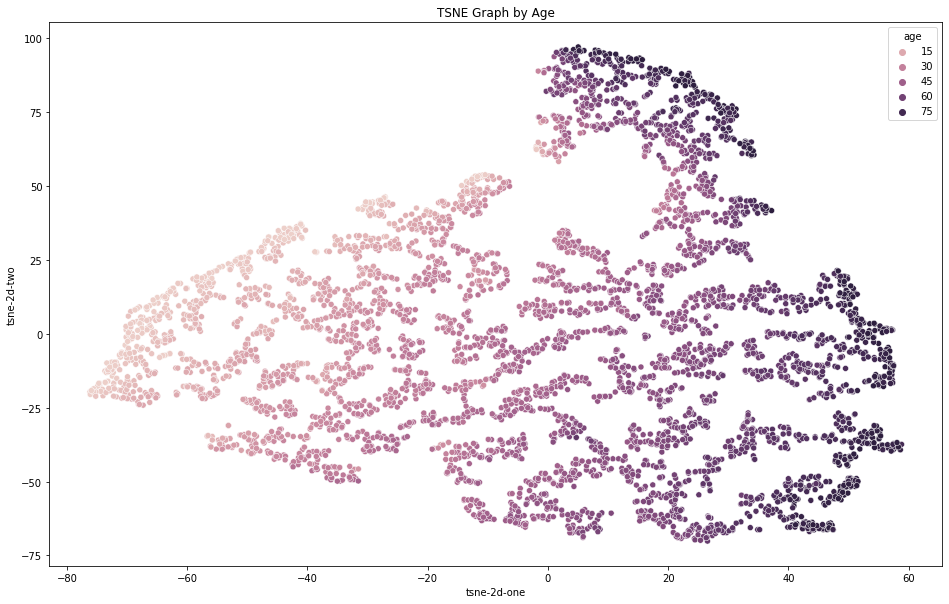

In [89]:
combined_df['tsne-2d-one'] = tsne_data[:,0]
combined_df['tsne-2d-two'] = tsne_data[:,1]
plt.figure(figsize=(16,10))
graph = sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="age",
    data=combined_df,
    
  
)
graph.set_title("TSNE Graph by Age")

Seems like the data can be grouped into clusters by age, people with similiar ages tend to have similiar values all around.